# Name: Seif Yasser Ahmed

# ID: 21P0102

# Deep Learning Assignment

# Table of contents<a id='toc0_'></a>    
- [Imports](#toc1_)    
- [Standard Scaled](#toc2_)    
    - [Data Splits Distribution](#toc2_1_1_)    
  - [Manual Training](#toc2_2_)    
      - [Losses](#toc2_2_1_1_)    
  - [Automatic Training](#toc2_3_)    
    - [Adam](#toc2_3_1_)    
      - [Losses](#toc2_3_1_1_)    
    - [RMSProp](#toc2_3_2_)    
      - [Losses](#toc2_3_2_1_)    
- [MinMax Scaled](#toc3_)    
  - [Manual Training](#toc3_1_)    
      - [Losses](#toc3_1_1_1_)    
  - [Automatic Training](#toc3_2_)    
    - [Adam](#toc3_2_1_)    
      - [Losses](#toc3_2_1_1_)    
    - [RMSProp](#toc3_2_2_)    
      - [Losses](#toc3_2_2_1_)    
- [Robust Scaled](#toc4_)    
  - [Manual Training](#toc4_1_)    
      - [Losses](#toc4_1_1_1_)    
  - [Automatic Training](#toc4_2_)    
    - [Adam](#toc4_2_1_)    
      - [Losses](#toc4_2_1_1_)    
    - [RMSProp](#toc4_2_2_)    
      - [Losses](#toc4_2_2_1_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Imports](#toc0_)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn


In [2]:
iris=sns.load_dataset("iris")

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
data=iris[iris['species']!='setosa']

In [6]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [7]:
data['species'].value_counts()

species
versicolor    50
virginica     50
Name: count, dtype: int64

<Axes: xlabel='species'>

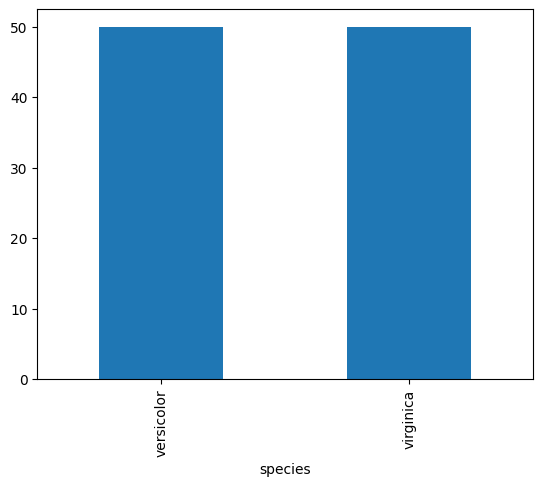

In [8]:
data['species'].value_counts().plot(kind='bar')

In [9]:
data['species_num']=data['species'].map({'versicolor':1,'virginica':2})

C:\Users\Seif Yasser\AppData\Local\Temp\ipykernel_26508\2353294396.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['species_num']=data['species'].map({'versicolor':1,'virginica':2})


In [10]:
X=np.asarray(data.loc[:,['sepal_length','sepal_width']],dtype='float32')
Y=np.asarray(data.loc[:,['petal_length','petal_width']],dtype='float32')
labels=np.asarray(data['species_num'],dtype='int32')

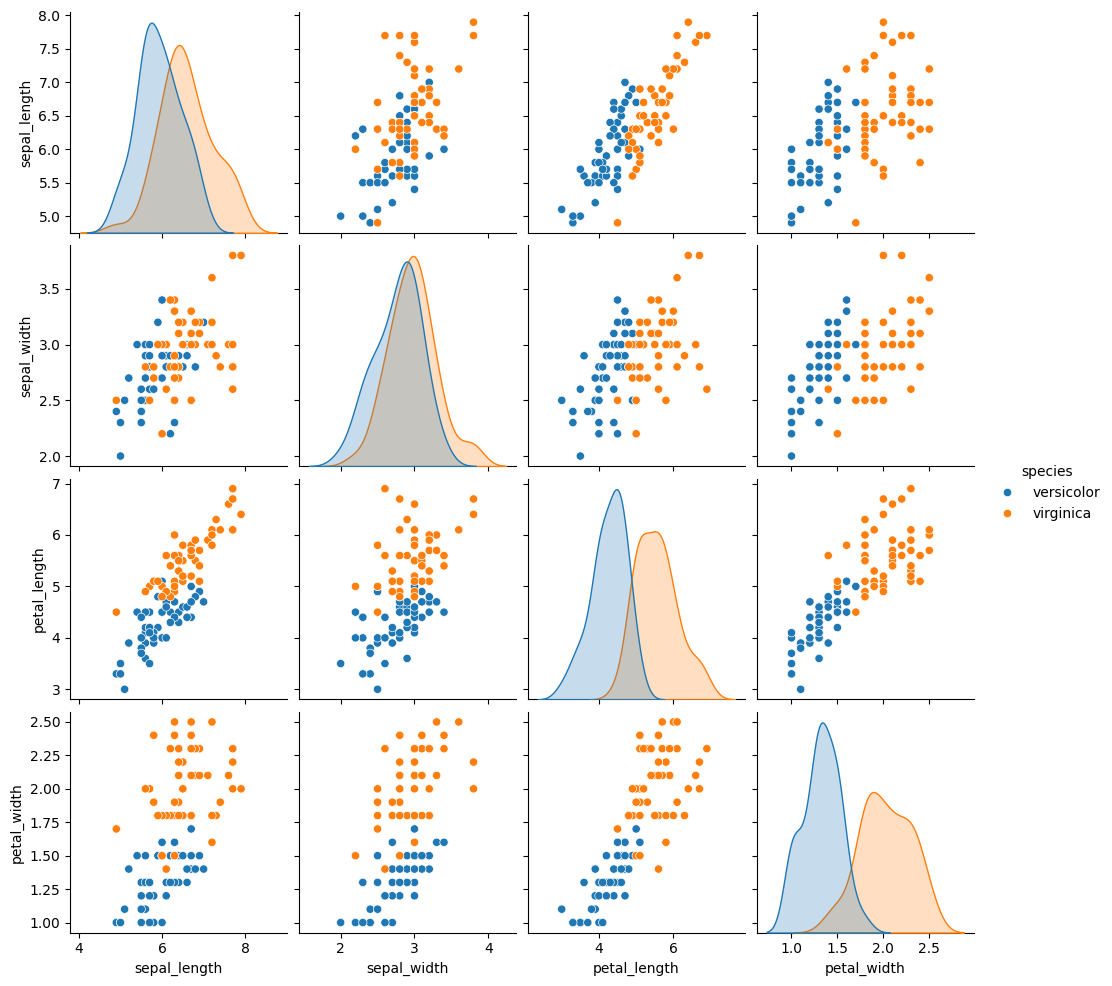

In [11]:
sns.pairplot(data.drop(columns=['species_num']), hue='species', diag_kind='kde')

In [12]:
class NN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 10, bias=False) 
        # self.fc2 = nn.Linear(10, 10, bias=False)
        self.fc3 = nn.Linear(10, output_dim, bias=False)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        # x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        # x= torch.sigmoid(x)
        return x

In [13]:
def Manual_training_loop(model,criterion,lr,epochs,X_train,Y_train,X_val,Y_val):
    train_losses=[]
    val_losses=[]
    for epoch in range(epochs):
        model.train()
        outputs=model(X_train)
        loss=criterion(outputs,Y_train)
        model.zero_grad()
        loss.backward()
        
        with torch.no_grad():
            for param in model.parameters():
                param -= lr * param.grad
                
        model.eval()
        with torch.no_grad():
            prediction=model(X_val)
            val_loss=criterion(prediction,Y_val)
        train_losses.append(loss.item())
        val_losses.append(val_loss.item())
        if epoch%100==0:
            print(f'Epoch [{epoch}], Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')
    return train_losses,val_losses

In [14]:
def Automatic_training_loop(model,criterion,optimizer,epochs,X_train,Y_train,X_val,Y_val):
    train_losses=[]
    val_losses=[]
    for epoch in range(epochs):
        model.train()
        outputs=model(X_train)
        loss=criterion(outputs,Y_train)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        model.eval()
        with torch.no_grad():
            prediction=model(X_val)
            val_loss=criterion(prediction,Y_val)
        train_losses.append(loss.item())
        val_losses.append(val_loss.item())
        if epoch%100==0:
            print(f'Epoch [{epoch}], Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')

    return train_losses,val_losses

In [15]:
import os

def Plot(train_losses, val_losses, optimizer, scaler):
    plt.figure(figsize=(5, 3))
    plt.plot(train_losses, label="Training Loss")
    plt.plot(val_losses, label="Validation Loss")
    plt.xlabel("Epoch")
    plt.ylabel("MSE Loss")
    plt.title(f"Training vs Validation Losses -> {optimizer} {scaler} Scaled")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    
    # Save the plot as an image
    directory = f"./{scaler}"
    filename = f"{optimizer}.png"
    os.makedirs(directory, exist_ok=True)
    plt.savefig(f"{directory}/{filename}")
    plt.show()

# <a id='toc2_'></a>[Standard Scaled](#toc0_)

In [16]:
scaler=StandardScaler()
X=scaler.fit_transform(X)
Y=scaler.fit_transform(Y)

In [17]:
X_train, X_test, Y_train, Y_test, labels_train, labels_test = train_test_split(X, Y, labels, test_size=0.5, random_state=42)

### <a id='toc2_1_1_'></a>[Data Splits Distribution](#toc0_)

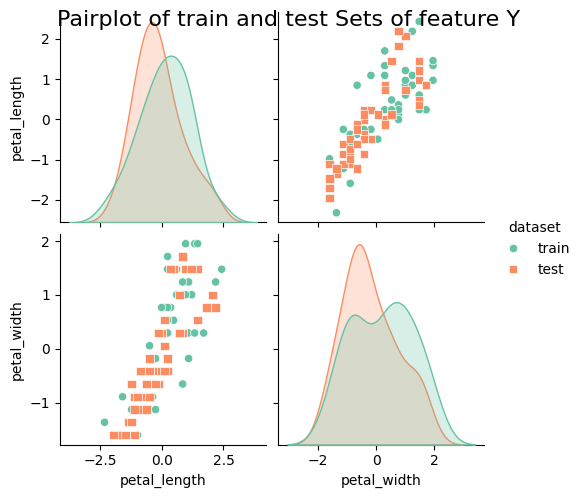

In [18]:
train_data = pd.DataFrame(Y_train, columns=['petal_length', 'petal_width'])
train_data['dataset'] = 'train'

test_data = pd.DataFrame(Y_test, columns=['petal_length', 'petal_width'])
test_data['dataset'] = 'test'

combined_data = pd.concat([train_data, test_data])
sns.pairplot(combined_data, hue='dataset', diag_kind='kde', markers=["o", "s"], palette='Set2')
plt.suptitle('Pairplot of train and test Sets of feature Y', fontsize=16)
plt.show()

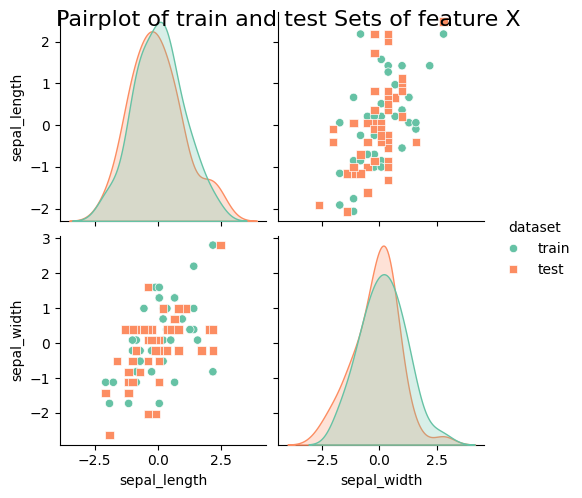

In [19]:
train_data = pd.DataFrame(X_train, columns=['sepal_length', 'sepal_width'])
train_data['dataset'] = 'train'

test_data = pd.DataFrame(X_test, columns=['sepal_length', 'sepal_width'])
test_data['dataset'] = 'test'

combined_data = pd.concat([train_data, test_data])
sns.pairplot(combined_data, hue='dataset', diag_kind='kde', markers=["o", "s"], palette='Set2')
plt.suptitle('Pairplot of train and test Sets of feature X', fontsize=16)
plt.show()

In [20]:
train_features = torch.tensor(np.hstack([X_train, Y_train]), dtype=torch.float32)

In [21]:
train_features.shape

torch.Size([50, 4])

In [22]:
test_features = torch.tensor(np.hstack([X_test, Y_test]), dtype=torch.float32)

In [23]:
labels_train = torch.tensor(labels_train, dtype=torch.float32)
labels_test = torch.tensor(labels_test, dtype=torch.float32)

In [24]:
model=NN(input_dim=4, output_dim=1)

In [25]:
criterion=nn.MSELoss()

In [26]:
epochs=1000
lr=0.01

## <a id='toc2_2_'></a>[Manual Training](#toc0_)

In [27]:
train_losses,val_losses=Manual_training_loop(model,criterion,lr=0.01,epochs=1000,X_train=train_features,Y_train=labels_train,X_val=test_features,Y_val=labels_test)

c:\Users\Seif Yasser\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([50])) that is different to the input size (torch.Size([50, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [0], Loss: 3.5431, Val Loss: 2.5388
Epoch [100], Loss: 0.9384, Val Loss: 0.8787
Epoch [200], Loss: 0.7424, Val Loss: 0.7371
Epoch [300], Loss: 0.6142, Val Loss: 0.6202
Epoch [400], Loss: 0.5590, Val Loss: 0.5813
Epoch [500], Loss: 0.5264, Val Loss: 0.5773
Epoch [600], Loss: 0.5046, Val Loss: 0.5732
Epoch [700], Loss: 0.4885, Val Loss: 0.5698
Epoch [800], Loss: 0.4767, Val Loss: 0.5643
Epoch [900], Loss: 0.4628, Val Loss: 0.5586


#### <a id='toc2_2_1_1_'></a>[Losses](#toc0_)

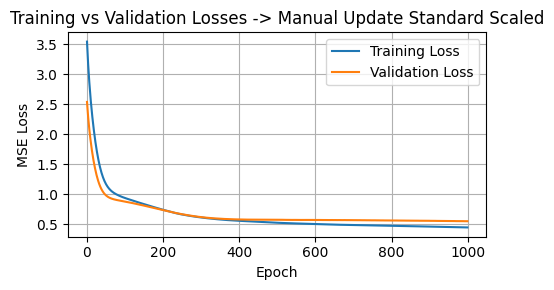

In [28]:
Plot(train_losses,val_losses,"Manual Update","Standard")

## <a id='toc2_3_'></a>[Automatic Training](#toc0_)

### <a id='toc2_3_1_'></a>[Adam](#toc0_)

In [29]:
model=NN(input_dim=4, output_dim=1)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [30]:
train_losses, val_losses = Automatic_training_loop(model, criterion, optimizer, epochs, train_features, labels_train, test_features, labels_test)

c:\Users\Seif Yasser\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([50])) that is different to the input size (torch.Size([50, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [0], Loss: 2.9051, Val Loss: 2.1115
Epoch [100], Loss: 0.4213, Val Loss: 0.5511
Epoch [200], Loss: 0.3648, Val Loss: 0.4898
Epoch [300], Loss: 0.3508, Val Loss: 0.4974
Epoch [400], Loss: 0.3441, Val Loss: 0.4853
Epoch [500], Loss: 0.3403, Val Loss: 0.4885
Epoch [600], Loss: 0.3368, Val Loss: 0.4923
Epoch [700], Loss: 0.3352, Val Loss: 0.4911
Epoch [800], Loss: 0.3343, Val Loss: 0.4864
Epoch [900], Loss: 0.3335, Val Loss: 0.4849


#### <a id='toc2_3_1_1_'></a>[Losses](#toc0_)

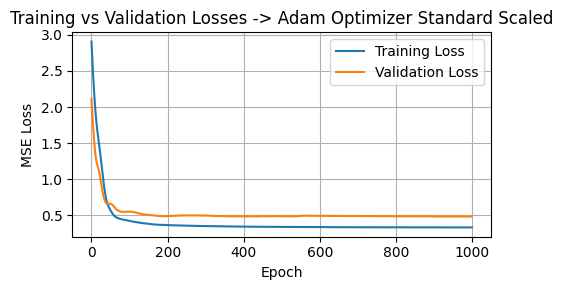

In [31]:
Plot(train_losses,val_losses,"Adam Optimizer","Standard")

### <a id='toc2_3_2_'></a>[RMSProp](#toc0_)

In [32]:
model=NN(input_dim=4, output_dim=1)
optimizer = torch.optim.RMSprop(model.parameters(), lr=0.001)

In [33]:
train_losses, val_losses = Automatic_training_loop(model, criterion, optimizer, epochs, train_features, labels_train, test_features, labels_test)

Epoch [0], Loss: 2.6107, Val Loss: 1.9007
Epoch [100], Loss: 0.9831, Val Loss: 0.8685
Epoch [200], Loss: 0.7986, Val Loss: 0.7962
Epoch [300], Loss: 0.6458, Val Loss: 0.6683
Epoch [400], Loss: 0.5219, Val Loss: 0.5907
Epoch [500], Loss: 0.4536, Val Loss: 0.5583
Epoch [600], Loss: 0.4205, Val Loss: 0.5411
Epoch [700], Loss: 0.3957, Val Loss: 0.5312
Epoch [800], Loss: 0.3812, Val Loss: 0.5213
Epoch [900], Loss: 0.3725, Val Loss: 0.5103


#### <a id='toc2_3_2_1_'></a>[Losses](#toc0_)

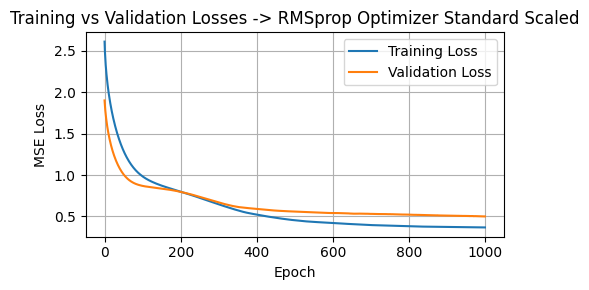

In [34]:
Plot(train_losses,val_losses,"RMSprop Optimizer","Standard")

# <a id='toc3_'></a>[MinMax Scaled](#toc0_)

In [35]:
scaler = MinMaxScaler()
X=scaler.fit_transform(X)
Y=scaler.fit_transform(Y)

In [36]:
X_train, X_test, Y_train, Y_test, labels_train, labels_test = train_test_split(X, Y, labels, test_size=0.5, random_state=42)

In [37]:
train_features = torch.tensor(np.hstack([X_train, Y_train]), dtype=torch.float32)

In [38]:
test_features = torch.tensor(np.hstack([X_test, Y_test]), dtype=torch.float32)

In [39]:
labels_train = torch.tensor(labels_train, dtype=torch.float32)
labels_test = torch.tensor(labels_test, dtype=torch.float32)

## <a id='toc3_1_'></a>[Manual Training](#toc0_)

In [40]:
model=NN(input_dim=4, output_dim=1)

In [41]:
train_losses,val_losses=Manual_training_loop(model,criterion,lr=0.01,epochs=1000,X_train=train_features,Y_train=labels_train,X_val=test_features,Y_val=labels_test)

c:\Users\Seif Yasser\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([50])) that is different to the input size (torch.Size([50, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [0], Loss: 2.4222, Val Loss: 1.8587
Epoch [100], Loss: 0.5511, Val Loss: 0.5438
Epoch [200], Loss: 0.5405, Val Loss: 0.5356
Epoch [300], Loss: 0.5314, Val Loss: 0.5275
Epoch [400], Loss: 0.5237, Val Loss: 0.5205
Epoch [500], Loss: 0.5169, Val Loss: 0.5143
Epoch [600], Loss: 0.5111, Val Loss: 0.5087
Epoch [700], Loss: 0.5051, Val Loss: 0.5032
Epoch [800], Loss: 0.4993, Val Loss: 0.4983
Epoch [900], Loss: 0.4925, Val Loss: 0.4933


#### <a id='toc3_1_1_1_'></a>[Losses](#toc0_)

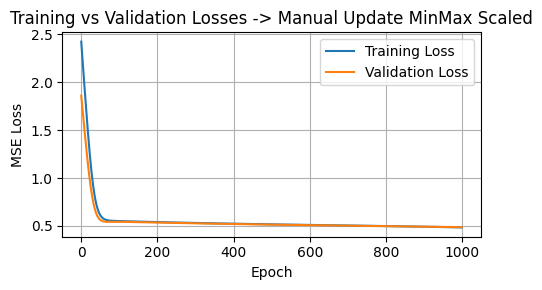

In [42]:
Plot(train_losses,val_losses,"Manual Update","MinMax")

## <a id='toc3_2_'></a>[Automatic Training](#toc0_)

### <a id='toc3_2_1_'></a>[Adam](#toc0_)

In [43]:
model=NN(input_dim=4, output_dim=1)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [44]:
train_losses, val_losses = Automatic_training_loop(model, criterion, optimizer, epochs, train_features, labels_train, test_features, labels_test)

Epoch [0], Loss: 2.2625, Val Loss: 1.6753
Epoch [100], Loss: 0.4961, Val Loss: 0.5071
Epoch [200], Loss: 0.4264, Val Loss: 0.4702
Epoch [300], Loss: 0.3876, Val Loss: 0.4495
Epoch [400], Loss: 0.3652, Val Loss: 0.4355
Epoch [500], Loss: 0.3489, Val Loss: 0.4238
Epoch [600], Loss: 0.3359, Val Loss: 0.4192
Epoch [700], Loss: 0.3311, Val Loss: 0.4227
Epoch [800], Loss: 0.3295, Val Loss: 0.4241
Epoch [900], Loss: 0.3286, Val Loss: 0.4256


#### <a id='toc3_2_1_1_'></a>[Losses](#toc0_)

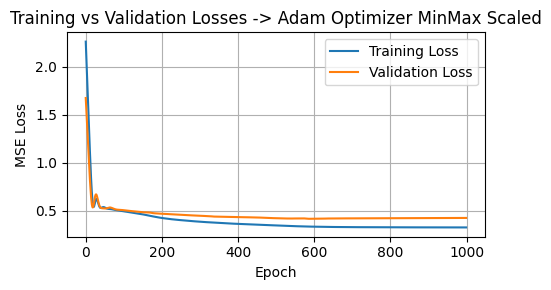

In [45]:
Plot(train_losses,val_losses,"Adam Optimizer","MinMax")

### <a id='toc3_2_2_'></a>[RMSProp](#toc0_)

In [46]:
model=NN(input_dim=4, output_dim=1)
optimizer = torch.optim.RMSprop(model.parameters(), lr=0.001)

In [47]:
train_losses, val_losses = Automatic_training_loop(model, criterion, optimizer, epochs, train_features, labels_train, test_features, labels_test)

Epoch [0], Loss: 3.3405, Val Loss: 2.5568
Epoch [100], Loss: 1.0051, Val Loss: 0.8329
Epoch [200], Loss: 0.5532, Val Loss: 0.5315
Epoch [300], Loss: 0.5291, Val Loss: 0.5269
Epoch [400], Loss: 0.5240, Val Loss: 0.5228
Epoch [500], Loss: 0.5171, Val Loss: 0.5160
Epoch [600], Loss: 0.5089, Val Loss: 0.5073
Epoch [700], Loss: 0.5002, Val Loss: 0.4971
Epoch [800], Loss: 0.4919, Val Loss: 0.4861
Epoch [900], Loss: 0.4842, Val Loss: 0.4747


#### <a id='toc3_2_2_1_'></a>[Losses](#toc0_)

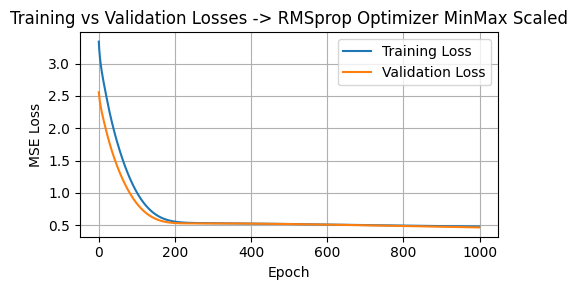

In [48]:
Plot(train_losses,val_losses,"RMSprop Optimizer","MinMax")

# <a id='toc4_'></a>[Robust Scaled](#toc0_)

In [49]:
scaler = RobustScaler()
X=scaler.fit_transform(X)
Y=scaler.fit_transform(Y)


In [50]:
X_train, X_test, Y_train, Y_test, labels_train, labels_test = train_test_split(X, Y, labels, test_size=0.5, random_state=42)

In [51]:
train_features = torch.tensor(np.hstack([X_train, Y_train]), dtype=torch.float32)

In [52]:
test_features = torch.tensor(np.hstack([X_test, Y_test]), dtype=torch.float32)

In [53]:
labels_train = torch.tensor(labels_train, dtype=torch.float32)
labels_test = torch.tensor(labels_test, dtype=torch.float32)

## <a id='toc4_1_'></a>[Manual Training](#toc0_)

In [54]:
model=NN(input_dim=4, output_dim=1)

In [55]:
train_losses,val_losses=Manual_training_loop(model,criterion,lr=0.01,epochs=1000,X_train=train_features,Y_train=labels_train,X_val=test_features,Y_val=labels_test)

c:\Users\Seif Yasser\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([50])) that is different to the input size (torch.Size([50, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [0], Loss: 3.1340, Val Loss: 2.3953
Epoch [100], Loss: 0.9106, Val Loss: 0.8192
Epoch [200], Loss: 0.7329, Val Loss: 0.7284
Epoch [300], Loss: 0.6654, Val Loss: 0.6682
Epoch [400], Loss: 0.6059, Val Loss: 0.6164
Epoch [500], Loss: 0.5532, Val Loss: 0.5928
Epoch [600], Loss: 0.5126, Val Loss: 0.5894
Epoch [700], Loss: 0.4891, Val Loss: 0.5844
Epoch [800], Loss: 0.4716, Val Loss: 0.5782
Epoch [900], Loss: 0.4542, Val Loss: 0.5706


#### <a id='toc4_1_1_1_'></a>[Losses](#toc0_)

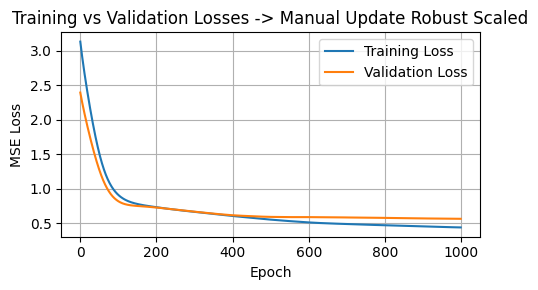

In [56]:
Plot(train_losses,val_losses,"Manual Update","Robust")

## <a id='toc4_2_'></a>[Automatic Training](#toc0_)

### <a id='toc4_2_1_'></a>[Adam](#toc0_)

In [57]:
model=NN(input_dim=4, output_dim=1)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [58]:
train_losses, val_losses = Automatic_training_loop(model, criterion, optimizer, epochs, train_features, labels_train, test_features, labels_test)

Epoch [0], Loss: 3.0837, Val Loss: 2.4252
Epoch [100], Loss: 0.5114, Val Loss: 0.6148
Epoch [200], Loss: 0.4088, Val Loss: 0.5770
Epoch [300], Loss: 0.3663, Val Loss: 0.5517
Epoch [400], Loss: 0.3543, Val Loss: 0.5434
Epoch [500], Loss: 0.3457, Val Loss: 0.5398
Epoch [600], Loss: 0.3384, Val Loss: 0.5458
Epoch [700], Loss: 0.3347, Val Loss: 0.5443
Epoch [800], Loss: 0.3322, Val Loss: 0.5397
Epoch [900], Loss: 0.3307, Val Loss: 0.5351


#### <a id='toc4_2_1_1_'></a>[Losses](#toc0_)

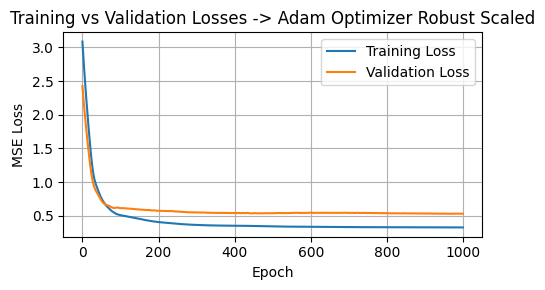

In [59]:
Plot(train_losses,val_losses,"Adam Optimizer","Robust")

### <a id='toc4_2_2_'></a>[RMSProp](#toc0_)

In [60]:
model=NN(input_dim=4, output_dim=1)
optimizer = torch.optim.RMSprop(model.parameters(), lr=0.001)

In [61]:
train_losses, val_losses = Automatic_training_loop(model, criterion, optimizer, epochs, train_features, labels_train, test_features, labels_test)

Epoch [0], Loss: 2.5479, Val Loss: 1.9382
Epoch [100], Loss: 1.0236, Val Loss: 0.8109
Epoch [200], Loss: 0.7748, Val Loss: 0.7022
Epoch [300], Loss: 0.6643, Val Loss: 0.6463
Epoch [400], Loss: 0.5705, Val Loss: 0.6013
Epoch [500], Loss: 0.5018, Val Loss: 0.5701
Epoch [600], Loss: 0.4541, Val Loss: 0.5562
Epoch [700], Loss: 0.4176, Val Loss: 0.5586
Epoch [800], Loss: 0.3975, Val Loss: 0.5593
Epoch [900], Loss: 0.3839, Val Loss: 0.5561


#### <a id='toc4_2_2_1_'></a>[Losses](#toc0_)

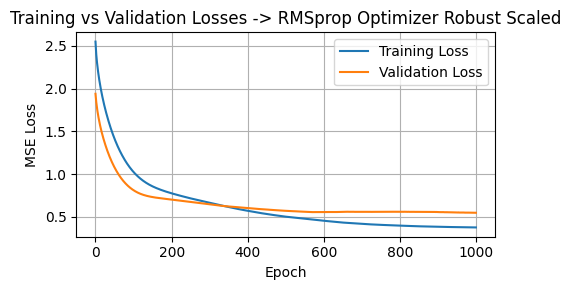

In [62]:
Plot(train_losses,val_losses,"RMSprop Optimizer","Robust")